In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from aif360.algorithms.preprocessing.reweighing import Reweighing
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


In [2]:
raw_data = pd.read_csv('part-00000-89e4e981-b690-48ea-9e84-dbd29c002ff9-c000.csv')

In [3]:
raw_data.shape

(701292, 35)

In [4]:
raw_data.columns=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [5]:
raw_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,828818,...,4,80,4,11,4,1,19,19,18,2
1,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,1,407506,...,1,80,1,12,1,1,10,7,10,2
2,27,Yes,Travel_Frequently,670,Sales,20,3,Other,1,503493,...,1,80,3,33,4,1,9,7,7,3
3,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,1,453899,...,3,80,3,19,6,4,1,1,1,2
4,21,No,Travel_Rarely,1071,Life Sciences,33,5,Marketing,1,312585,...,1,80,1,16,4,1,2,1,2,1


In [6]:
print(raw_data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [7]:
raw_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
raw_data.dropna(axis=0,inplace=True)

In [9]:
data = raw_data.drop_duplicates()

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,701292.0000,701292.000000,701292.000000,701292.000000,701292.0,7.012920e+05,701292.000000,701292.000000,701292.000000,701292.000000,...,701292.000000,701292.0,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000,701292.000000
mean,39.4623,797.796754,26.085817,2.943698,1.0,4.943117e+05,2.291147,114.893651,1.837665,2.941592,...,2.188722,80.0,2.427964,17.816330,3.451644,1.750442,10.573286,5.854791,5.821166,6.594608
std,12.1379,476.530372,14.028888,1.450506,0.0,2.984215e+05,1.129057,53.812829,1.043701,1.452345,...,1.105878,0.0,1.149389,11.422511,1.746825,1.047646,8.735921,5.942622,5.969400,7.095264
min,18.0000,11.000000,1.000000,1.000000,1.0,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0000,445.000000,14.000000,2.000000,1.0,2.301455e+05,1.000000,72.000000,1.000000,2.000000,...,1.000000,80.0,1.000000,7.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,39.0000,798.000000,28.000000,3.000000,1.0,4.965345e+05,2.000000,114.000000,1.000000,3.000000,...,2.000000,80.0,2.000000,18.000000,3.000000,1.000000,8.000000,4.000000,4.000000,4.000000
75%,50.0000,1142.000000,38.000000,4.000000,1.0,7.484162e+05,3.000000,158.000000,3.000000,4.000000,...,3.000000,80.0,4.000000,27.000000,5.000000,2.000000,16.000000,8.000000,8.000000,8.000000
max,60.0000,13459.000000,50.000000,5.000000,1.0,9.913457e+06,4.000000,1345.000000,4.000000,5.000000,...,4.000000,80.0,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,50.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701292 entries, 0 to 701291
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Age                       701292 non-null  int64 
 1   Attrition                 701292 non-null  object
 2   BusinessTravel            701292 non-null  object
 3   DailyRate                 701292 non-null  int64 
 4   Department                701292 non-null  object
 5   DistanceFromHome          701292 non-null  int64 
 6   Education                 701292 non-null  int64 
 7   EducationField            701292 non-null  object
 8   EmployeeCount             701292 non-null  int64 
 9   EmployeeNumber            701292 non-null  int64 
 10  EnvironmentSatisfaction   701292 non-null  int64 
 11  Gender                    701292 non-null  object
 12  HourlyRate                701292 non-null  int64 
 13  JobInvolvement            701292 non-null  int64 
 14  JobL

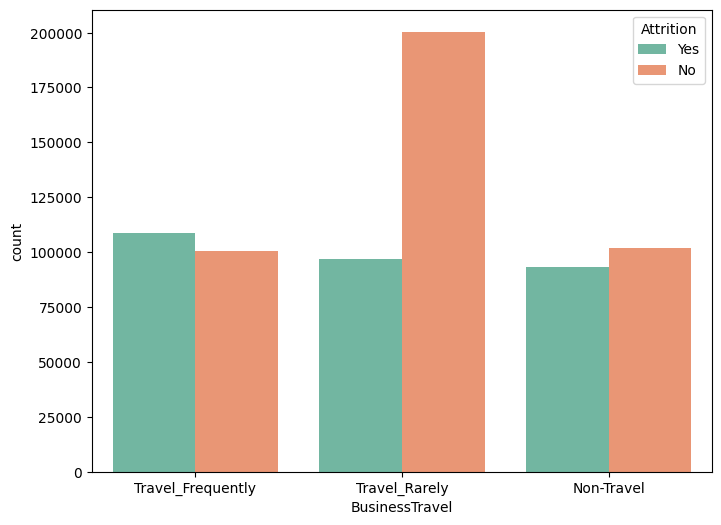

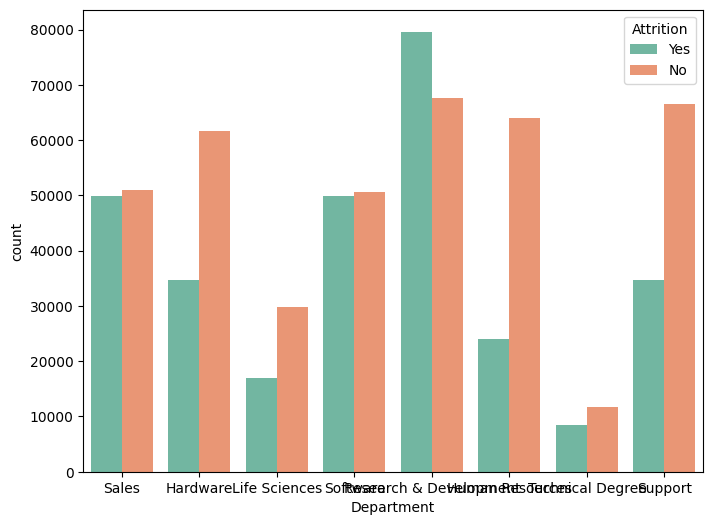

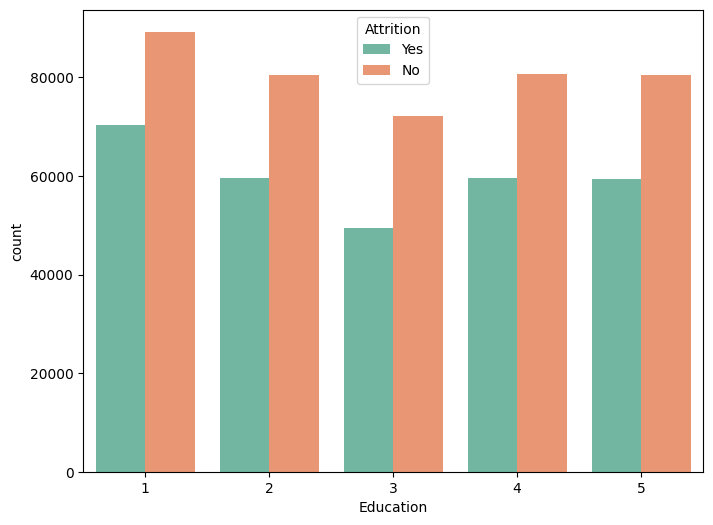

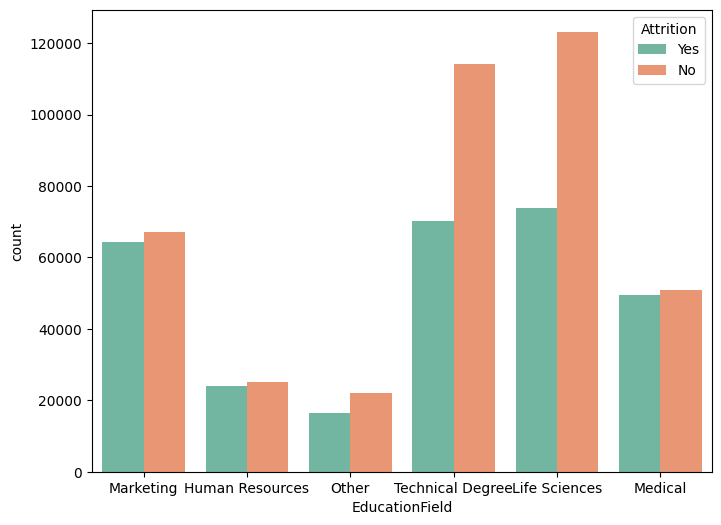

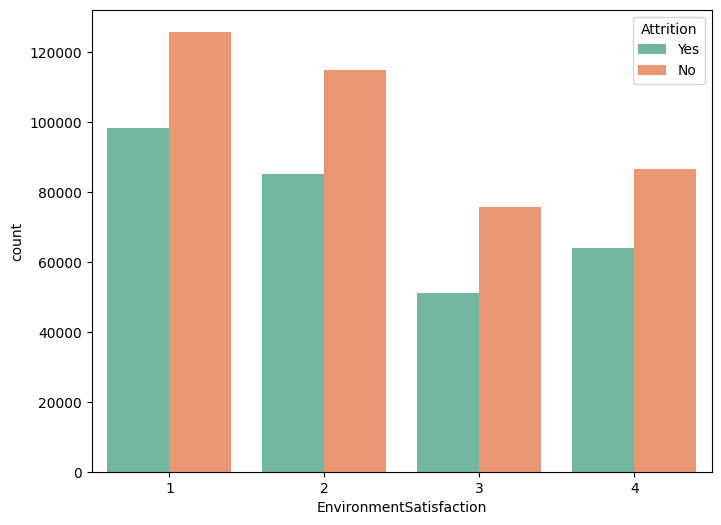

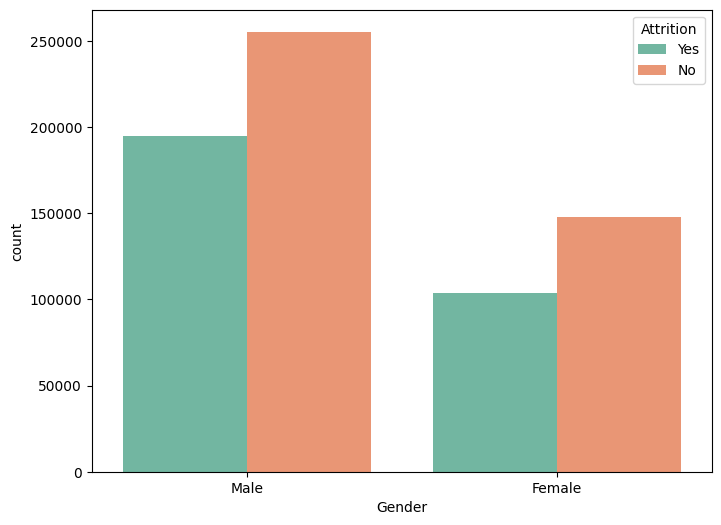

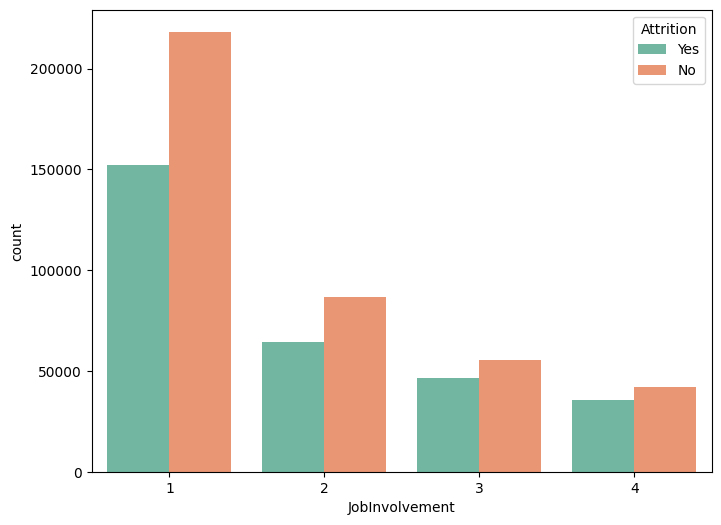

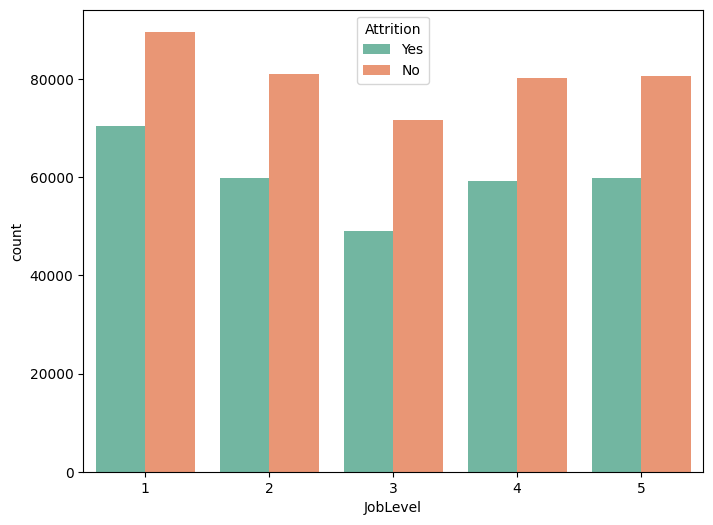

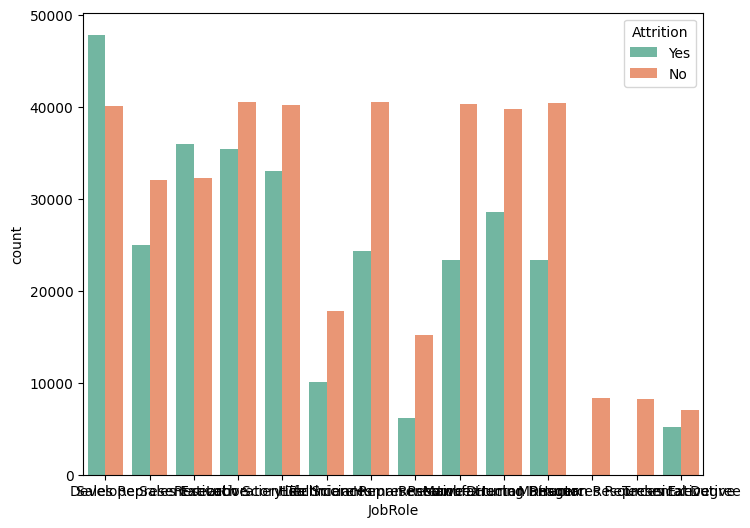

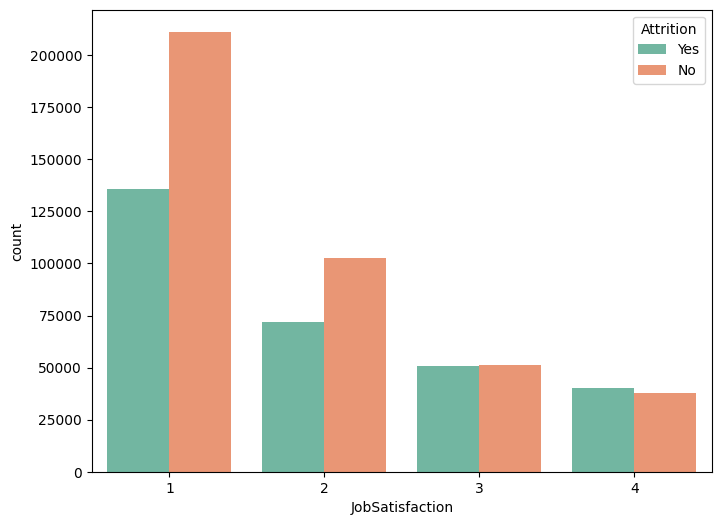

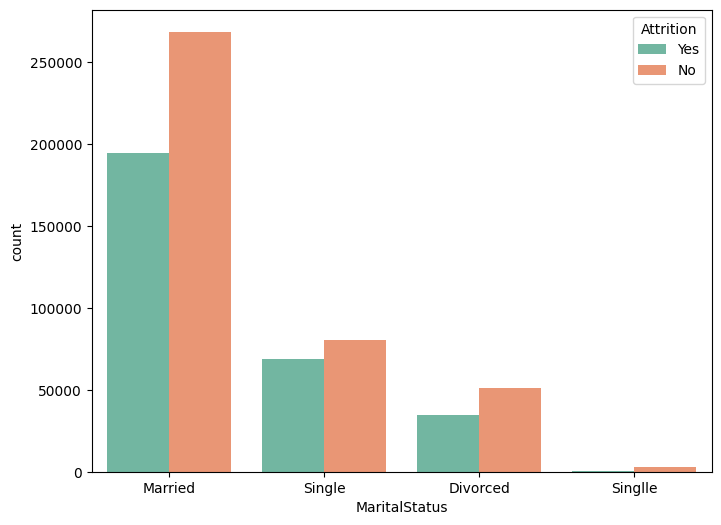

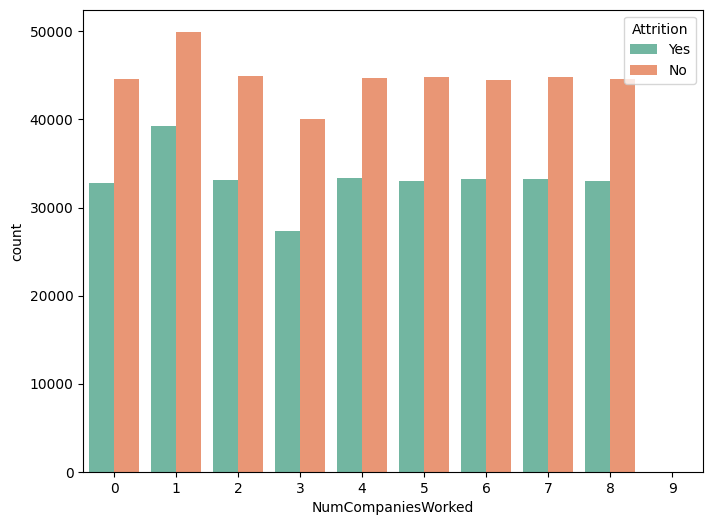

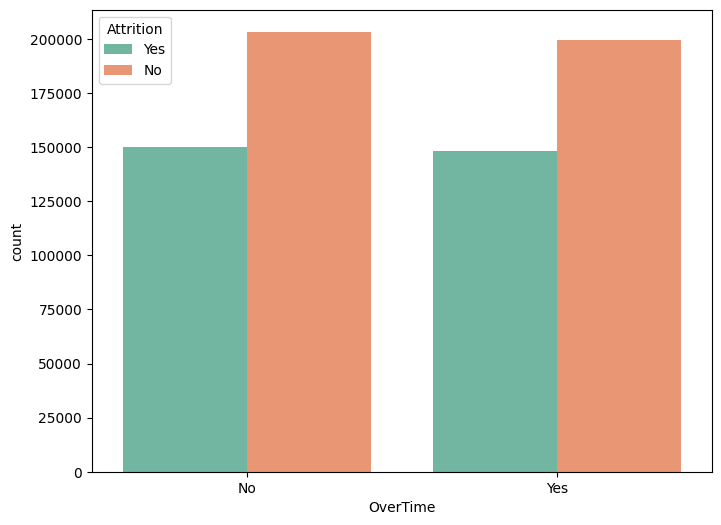

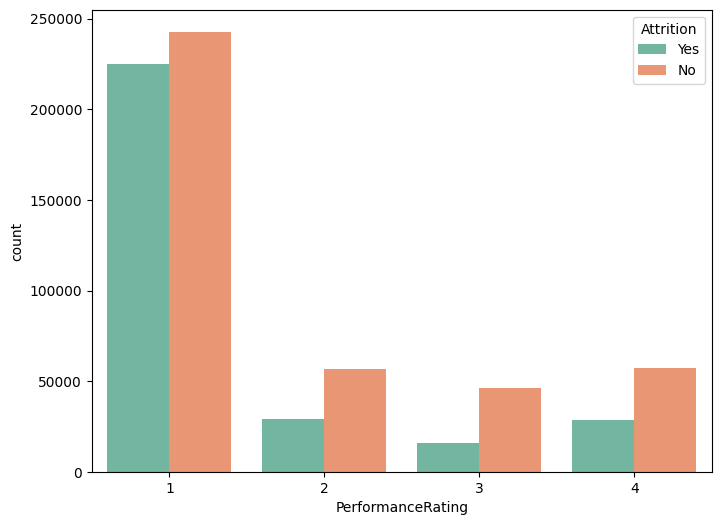

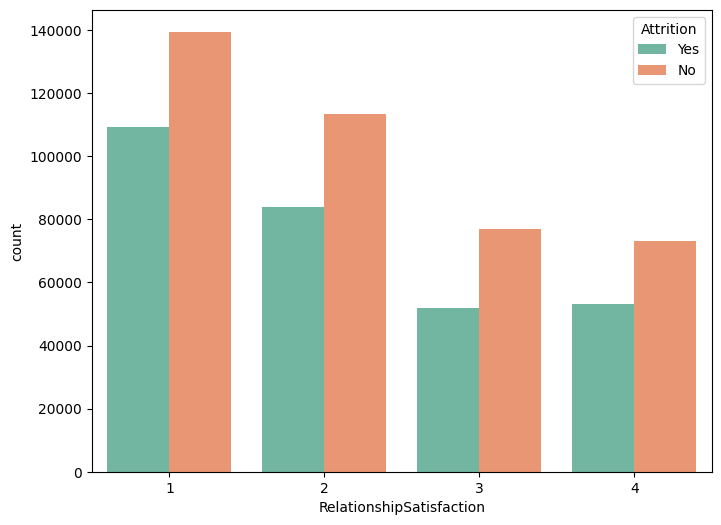

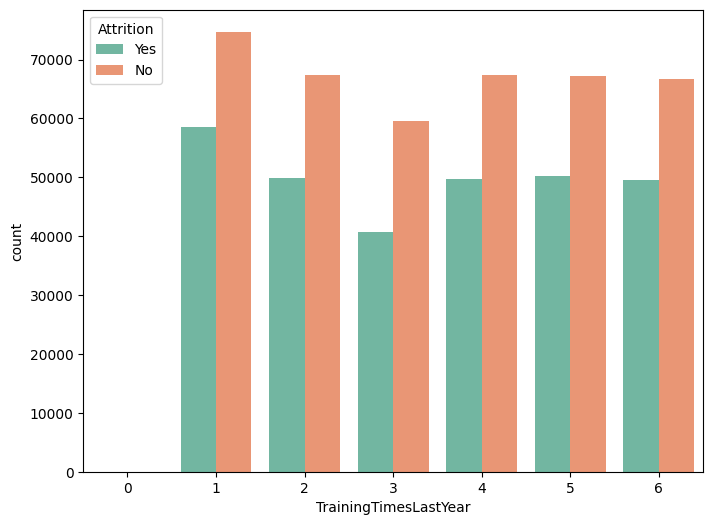

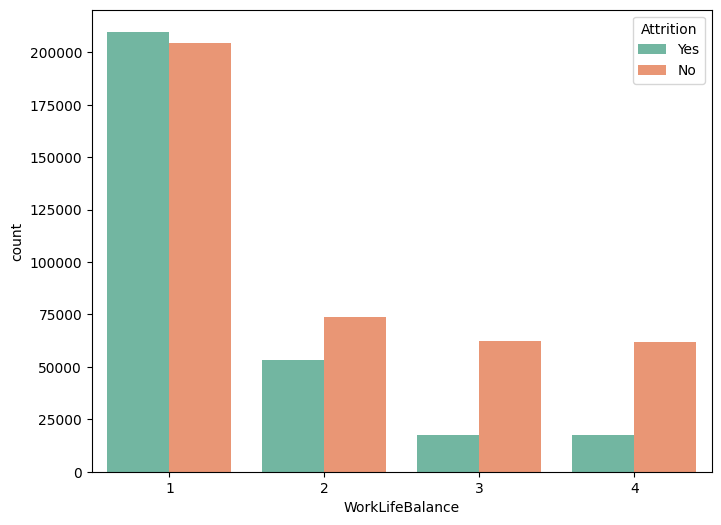

In [12]:
categorical_feature = ['BusinessTravel', 'Department','Education', 'EducationField',
                       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 
                        'JobRole', 'JobSatisfaction', 'MaritalStatus','NumCompaniesWorked', 'OverTime', 'PerformanceRating', 
                        'RelationshipSatisfaction','TrainingTimesLastYear', 'WorkLifeBalance']

for category in categorical_feature:
    plt.figure(figsize = (8,6))
    sns.countplot(x = category, data = data,hue = 'Attrition',palette='Set2')

In [15]:
data.shape

(701292, 35)

In [16]:
data.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True,axis=1)

In [17]:
data.shape

(701292, 30)

In [18]:
data = data.drop_duplicates()

In [19]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,55,Yes,Travel_Frequently,1041,Sales,11,1,Marketing,1,Male,...,42,1,4,11,4,1,19,19,18,2
1,21,Yes,Travel_Frequently,1147,Hardware,49,1,Human Resources,2,Female,...,19,1,1,12,1,1,10,7,10,2
2,27,Yes,Travel_Frequently,670,Sales,20,3,Other,2,Female,...,47,1,1,33,4,1,9,7,7,3
3,40,No,Travel_Rarely,1052,Hardware,48,1,Technical Degree,4,Female,...,47,1,3,19,6,4,1,1,1,2
4,21,No,Travel_Rarely,1071,Life Sciences,33,5,Marketing,2,Male,...,18,1,1,16,4,1,2,1,2,1


In [22]:
categorical_column = ['MonthlyIncome','Age','DistanceFromHome','WorkLifeBalance','MonthlyRate']
encoder=LabelEncoder()
data[categorical_column]=data[categorical_column].apply(encoder.fit_transform)

In [23]:
x=data[categorical_column]
x

,MonthlyIncome,Age,DistanceFromHome,WorkLifeBalance,MonthlyRate
0,15334,37,10,0,184950
1,44905,3,48,0,274615
2,36380,9,19,0,215707
3,39623,22,47,3,217087
4,28370,3,32,0,18957
...,...,...,...,...,...
701287,39903,37,0,3,322723
701288,10780,4,21,1,108188
701289,34297,30,38,0,243727
701290,17049,35,23,2,199745


In [26]:
categorical_column = ['Attrition']
encoder=LabelEncoder()
data[categorical_column]=data[categorical_column].apply(encoder.fit_transform)

In [28]:
y=data[categorical_column]
y

,Attrition
0,1
1,1
2,1
3,0
4,0
...,...
701287,0
701288,1
701289,1
701290,0


In [29]:
#y=data['Attrition']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

In [31]:
x_train.head()

,MonthlyIncome,Age,DistanceFromHome,WorkLifeBalance,MonthlyRate
421890,24206,14,41,0,139555
148332,13499,12,20,0,162905
285192,21480,42,2,2,213180
528961,42727,34,46,2,53856
280641,27368,29,22,3,131567


In [32]:
y_train.head()

,Attrition
421890,1
148332,0
285192,0
528961,0
280641,0


In [33]:
x_train.columns

Index(['MonthlyIncome', 'Age', 'DistanceFromHome', 'WorkLifeBalance',
       'MonthlyRate'],
      dtype='object')

In [34]:
corr = x_train.corr()
corr

,MonthlyIncome,Age,DistanceFromHome,WorkLifeBalance,MonthlyRate
MonthlyIncome,1.000000,0.017106,0.006460,0.027261,0.640754
Age,0.017106,1.000000,-0.050834,0.152679,0.009827
DistanceFromHome,0.006460,-0.050834,1.000000,-0.023509,-0.000461
WorkLifeBalance,0.027261,0.152679,-0.023509,1.000000,0.013051
MonthlyRate,0.640754,0.009827,-0.000461,0.013051,1.000000


In [36]:
print(data.shape)
data.head()

(701288, 30)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,Travel_Frequently,1041,Sales,10,1,Marketing,1,Male,...,42,1,4,11,4,0,19,19,18,2
1,3,1,Travel_Frequently,1147,Hardware,48,1,Human Resources,2,Female,...,19,1,1,12,1,0,10,7,10,2
2,9,1,Travel_Frequently,670,Sales,19,3,Other,2,Female,...,47,1,1,33,4,0,9,7,7,3
3,22,0,Travel_Rarely,1052,Hardware,47,1,Technical Degree,4,Female,...,47,1,3,19,6,3,1,1,1,2
4,3,0,Travel_Rarely,1071,Life Sciences,32,5,Marketing,2,Male,...,18,1,1,16,4,0,2,1,2,1


In [38]:
x_train

,MonthlyIncome,Age,DistanceFromHome,WorkLifeBalance,MonthlyRate
421890,24206,14,41,0,139555
148332,13499,12,20,0,162905
285192,21480,42,2,2,213180
528961,42727,34,46,2,53856
280641,27368,29,22,3,131567
...,...,...,...,...,...
33353,23619,14,35,1,219977
370581,11208,8,24,0,45560
2316,1130,33,0,3,22225
698359,25297,1,34,0,77389


In [39]:
y_train

,Attrition
421890,1
148332,0
285192,0
528961,0
280641,0
...,...
33353,1
370581,1
2316,0
698359,0


In [40]:
x_train.dtypes

MonthlyIncome       int64
Age                 int64
DistanceFromHome    int64
WorkLifeBalance     int64
MonthlyRate         int64
dtype: object

In [41]:
y_train.dtypes

Attrition    int32
dtype: object

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model_tree = RandomForestClassifier(n_estimators = 20,max_depth=5)
Model=model_tree.fit(x_train, y_train)
pred = Model.predict(x_test)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25800\1401625397.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model=model_tree.fit(x_train, y_train)


In [44]:
pred

array([0, 0, 1, ..., 0, 1, 0])

In [45]:
print("Accuracy Score: ",accuracy_score(pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(pred,y_test))
print("Classification Report: \n",classification_report(pred,y_test))

Accuracy Score:  0.7217128434741691
Confusion Matrix:
 [[70683 29132]
 [ 9900 30543]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.71      0.78     99815
           1       0.51      0.76      0.61     40443

    accuracy                           0.72    140258
   macro avg       0.69      0.73      0.70    140258
weighted avg       0.77      0.72      0.73    140258



In [46]:
import pickle

In [47]:
# file = open ('pickle1.pkl','wb')
# pickle.dump(Model,file)
# file.close()

In [48]:
filename = 'last123.sav'
pickle.dump(Model, open(filename,'wb'))

In [49]:
loaded_model = pickle.load(open('last123.sav','rb'))